In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot

In [2]:
X_xor = numpy.random.randn(200, 2)
y_xor = numpy.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = numpy.where(y_xor, 1, -1)

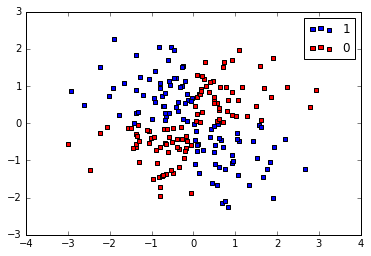

In [7]:
pyplot.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='s', label='1')
pyplot.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='0')
pyplot.ylim(-3.0)
pyplot.legend()
pyplot.show()

In [9]:
import math

x_arr = numpy.arange(0, 5, 0.01)
y = [math.exp(-x) for x in x_arr]

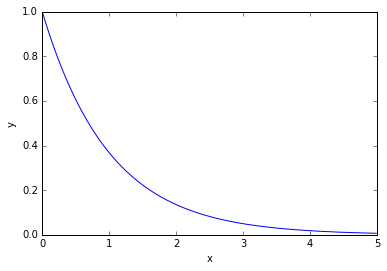

In [10]:
pyplot.figure()
pyplot.plot(x_arr, y)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

In [11]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
            alpha=1.0, linewidth=1, marker='o',
            s=55, label='test set')

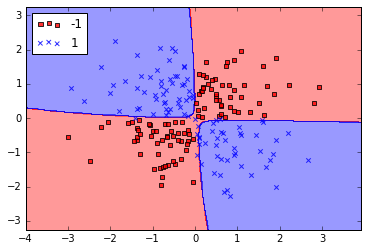

In [14]:
plot_decision_regions(X_xor, y_xor, classifier=svm)
pyplot.legend(loc='upper left')
pyplot.show()

In [15]:
import numpy as np

def sigmoid(x):
    ''' Sigmoid like function using tanh '''
    return np.tanh(x)

def dsigmoid(x):
    ''' Derivative of sigmoid above '''
    return 1.0-x**2

class MLP:
    ''' Multi-layer perceptron class. '''

    def __init__(self, *args):
        ''' Initialization of the perceptron with given sizes.  '''

        self.shape = args
        n = len(args)

        # Build layers
        self.layers = []
        # Input layer (+1 unit for bias)
        self.layers.append(np.ones(self.shape[0]+1))
        # Hidden layer(s) + output layer
        for i in range(1,n):
            self.layers.append(np.ones(self.shape[i]))

        # Build weights matrix (randomly between -0.25 and +0.25)
        self.weights = []
        for i in range(n-1):
            self.weights.append(np.zeros((self.layers[i].size,
                                         self.layers[i+1].size)))

        # dw will hold last change in weights (for momentum)
        self.dw = [0,]*len(self.weights)

        # Reset weights
        self.reset()

    def reset(self):
        ''' Reset weights '''

        for i in range(len(self.weights)):
            Z = np.random.random((self.layers[i].size,self.layers[i+1].size))
            self.weights[i][...] = (2*Z-1)*0.25

    def propagate_forward(self, data):
        ''' Propagate data from input layer to output layer. '''

        # Set input layer
        self.layers[0][0:-1] = data

        # Propagate from layer 0 to layer n-1 using sigmoid as activation function
        for i in range(1,len(self.shape)):
            # Propagate activity
            self.layers[i][...] = sigmoid(np.dot(self.layers[i-1],self.weights[i-1]))

        # Return output
        return self.layers[-1]


    def propagate_backward(self, target, lrate=0.1, momentum=0.1):
        ''' Back propagate error related to target using lrate. '''

        deltas = []

        # Compute error on output layer
        error = target - self.layers[-1]
        delta = error*dsigmoid(self.layers[-1])
        deltas.append(delta)

        # Compute error on hidden layers
        for i in range(len(self.shape)-2,0,-1):
            delta = np.dot(deltas[0],self.weights[i].T)*dsigmoid(self.layers[i])
            deltas.insert(0,delta)
            
        # Update weights
        for i in range(len(self.weights)):
            layer = np.atleast_2d(self.layers[i])
            delta = np.atleast_2d(deltas[i])
            dw = np.dot(layer.T,delta)
            self.weights[i] += lrate*dw + momentum*self.dw[i]
            self.dw[i] = dw

        # Return error
        return (error**2).sum()

In [23]:
import matplotlib
import matplotlib.pyplot as plt

def learn(network,samples, epochs=2500, lrate=.1, momentum=0.1):
    # Train 
    for i in range(epochs):
        n = np.random.randint(samples.size)
        network.propagate_forward( samples['input'][n] )
        network.propagate_backward( samples['output'][n], lrate, momentum )
    # Test
    for i in range(samples.size):
        o = network.propagate_forward( samples['input'][i] )
        print i, samples['input'][i], '%.2f' % o[0],
        print '(expected %.2f)' % samples['output'][i]
    print

network = MLP(2,2,1)
samples = np.zeros(4, dtype=[('input',  float, 2), ('output', float, 1)])

network.reset()
samples[0] = (0,0), 0
samples[1] = (1,0), 1
samples[2] = (0,1), 1
samples[3] = (1,1), 0
learn(network, samples)

0 [ 0.  0.] 0.01 (expected 0.00)
1 [ 1.  0.] 0.94 (expected 1.00)
2 [ 0.  1.] 0.94 (expected 1.00)
3 [ 1.  1.] 0.02 (expected 0.00)

